# Step 1: Install Required Libraries

In [1]:
! pip install -q tensorflow matplotlib kaggle

# Step 2: Import Libraries

In [4]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import os


In [5]:
# Download the dataset
!kaggle datasets download -d sabahesaraki/pix2pix-facades-dataset

# Unzip the downloaded file
!unzip pix2pix-facades-dataset.zip -d pix2pix_facades


Dataset URL: https://www.kaggle.com/datasets/sabahesaraki/pix2pix-facades-dataset
License(s): unknown
 87% 25.0M/28.9M [00:00<00:00, 80.7MB/s]
100% 28.9M/28.9M [00:00<00:00, 76.4MB/s]
Archive:  pix2pix-facades-dataset.zip
  inflating: pix2pix_facades/facades/test/1.jpg  
  inflating: pix2pix_facades/facades/test/10.jpg  
  inflating: pix2pix_facades/facades/test/100.jpg  
  inflating: pix2pix_facades/facades/test/101.jpg  
  inflating: pix2pix_facades/facades/test/102.jpg  
  inflating: pix2pix_facades/facades/test/103.jpg  
  inflating: pix2pix_facades/facades/test/104.jpg  
  inflating: pix2pix_facades/facades/test/105.jpg  
  inflating: pix2pix_facades/facades/test/106.jpg  
  inflating: pix2pix_facades/facades/test/11.jpg  
  inflating: pix2pix_facades/facades/test/12.jpg  
  inflating: pix2pix_facades/facades/test/13.jpg  
  inflating: pix2pix_facades/facades/test/14.jpg  
  inflating: pix2pix_facades/facades/test/15.jpg  
  inflating: pix2pix_facades/facades/test/16.jpg  
  infla

In [6]:
# Set up the path to your dataset
PATH = '/content/pix2pix_facades/facades/'

# New Section

In [8]:
# Function to preprocess the images
def preprocess_image(image_file):
    image = tf.io.read_file(image_file)
    image = tf.image.decode_jpeg(image)

    # Split the image into input and target
    w = tf.shape(image)[1] // 2
    input_image = image[:, :w, :]
    real_image = image[:, w:, :]

    # Normalize to [-1, 1]
    input_image = (tf.cast(input_image, tf.float32) / 127.5) - 1
    real_image = (tf.cast(real_image, tf.float32) / 127.5) - 1

    # Resize to 256x256
    input_image = tf.image.resize(input_image, [256, 256])
    real_image = tf.image.resize(real_image, [256, 256])

    return input_image, real_image

# Create training and test datasets
train_dataset = tf.data.Dataset.list_files(PATH + 'train/*.jpg')
train_dataset = train_dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(400).batch(1)

test_dataset = tf.data.Dataset.list_files(PATH + 'test/*.jpg')
test_dataset = test_dataset.map(preprocess_image)
test_dataset = test_dataset.batch(1)


In [11]:
!pip install -q git+https://github.com/tensorflow/examples.git

  Preparing metadata (setup.py) ... done


In [13]:
from tensorflow_examples.models.pix2pix import pix2pix

# Use the Pix2Pix generator and discriminator
OUTPUT_CHANNELS = 3
generator = pix2pix.unet_generator(OUTPUT_CHANNELS, norm_type='batchnorm')
discriminator = pix2pix.discriminator(norm_type='batchnorm')

# Display the model summaries
generator.summary()
discriminator.summary()


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None, None, 3)  │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential (Sequential)   │ (None, None, None, 64) │          3,072 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_1 (Sequential) │ (None, None, None,     │        131,584 │ sequential[0][0]       │
│                           │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_2 (Sequential) │ (None, None, None,     │        525,312 │ sequential_1[0][0]     │
│                           │ 256)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_3 (Sequential) │ (None, None, None,     │      2,099,200 │ sequential_2[0][0]     │
│                           │ 512)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_4 (Sequential) │ (None, None, None,     │      4,196,352 │ sequential_3[0][0]     │
│                           │ 512)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_5 (Sequential) │ (None, None, None,     │      4,196,352 │ sequential_4[0][0]     │
│                           │ 512)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_6 (Sequential) │ (None, None, None,     │      4,196,352 │ sequential_5[0][0]     │
│                           │ 512)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_7 (Sequential) │ (None, None, None,     │      4,196,352 │ sequential_6[0][0]     │
│                           │ 512)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_8 (Sequential) │ (None, None, None,     │      4,196,352 │ sequential_7[0][0]     │
│                           │ 512)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, None, None,     │              0 │ sequential_8[0][0],    │
│                           │ 128)                   │                │ sequential_6[0][0],    │
│                           │                        │                │ sequential_9[0][0],    │
│                           │                        │                │ sequential_5[0][0],    │
│                           │                        │                │ sequential_10[0][0],   │
│                           │                        │                │ sequential_4[0][0],    │
│                           │                        │                │ sequential_11[0][0],   │
│                           │                        │                │ sequential_3[0][0],    │
│                           │                        │                │ sequential_12[0][0],   │
│                           │                        │                │ sequential_2[0][0],    │
│                      

 Total params: 54,425,859 (207.62 MB)

 Trainable params: 54,414,979 (207.58 MB)

 Non-trainable params: 10,880 (42.50 KB)

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)  │ (None, None, None, 3)  │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ target_image (InputLayer) │ (None, None, None, 3)  │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, None, None, 6)  │              0 │ input_image[0][0],     │
│ (Concatenate)             │                        │                │ target_image[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_15             │ (None, None, None, 64) │          6,144 │ concatenate_1[0][0]    │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_16             │ (None, None, None,     │        131,584 │ sequential_15[0][0]    │
│ (Sequential)              │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_17             │ (None, None, None,     │        525,312 │ sequential_16[0][0]    │
│ (Sequential)              │ 256)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, None, None,     │              0 │ sequential_17[0][0]    │
│ (ZeroPadding2D)           │ 256)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, None, None,     │      2,097,152 │ zero_padding2d[0][0]   │
│                           │ 512)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_16    │ (None, None, None,     │          2,048 │ conv2d_11[0][0]        │
│ (BatchNormalization)      │ 512)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_11            │ (None, None, None,     │              0 │ batch_normalization_1… │
│ (LeakyReLU)               │ 512)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, None, None,     │              0 │ leaky_re_lu_11[0][0]   │
│ (ZeroPadding2D)           │ 512)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_12 (Conv2D)        │ (None, None, None, 1)  │          8,193 │ zero_padding2d_1[0][0] │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,770,433 (10.57 MB)

 Trainable params: 2,768,641 (10.56 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [14]:
# Import the necessary loss function
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Discriminator loss function
def discriminator_loss(disc_real_output, disc_generated_output):
    real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)
    generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)
    return real_loss + generated_loss

# Generator loss function
def generator_loss(disc_generated_output, gen_output, target):
    gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)
    l1_loss = tf.reduce_mean(tf.abs(target - gen_output))
    return gan_loss + (100 * l1_loss)

# Define the optimizers
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)


In [15]:
@tf.function
def train_step(input_image, target):
    with tf.GradientTape(persistent=True) as tape:
        # Generate images
        gen_output = generator(input_image, training=True)

        # Discriminator output for real and fake images
        disc_real_output = discriminator([input_image, target], training=True)
        disc_generated_output = discriminator([input_image, gen_output], training=True)

        # Calculate losses
        gen_loss = generator_loss(disc_generated_output, gen_output, target)
        disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

    # Compute gradients
    gen_gradients = tape.gradient(gen_loss, generator.trainable_variables)
    disc_gradients = tape.gradient(disc_loss, discriminator.trainable_variables)

    # Apply gradients
    generator_optimizer.apply_gradients(zip(gen_gradients, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(disc_gradients, discriminator.trainable_variables))

    return gen_loss, disc_loss


In [16]:
import time

def fit(train_ds, epochs):
    for epoch in range(epochs):
        start = time.time()

        for input_image, target in train_ds:
            gen_loss, disc_loss = train_step(input_image, target)

        print(f'Epoch {epoch+1}, Generator Loss: {gen_loss.numpy()}, Discriminator Loss: {disc_loss.numpy()}')
        print(f'Time taken for epoch {epoch+1} is {time.time()-start} sec\n')

# Train the model
EPOCHS = 50
fit(train_dataset, EPOCHS)


Epoch 1, Generator Loss: 46.95899963378906, Discriminator Loss: 0.10963970422744751
Time taken for epoch 1 is 63.25174283981323 sec

Epoch 2, Generator Loss: 27.565040588378906, Discriminator Loss: 0.3485502004623413
Time taken for epoch 2 is 45.5193030834198 sec

Epoch 3, Generator Loss: 31.898155212402344, Discriminator Loss: 0.8099508285522461
Time taken for epoch 3 is 45.58871293067932 sec

Epoch 4, Generator Loss: 39.68439483642578, Discriminator Loss: 0.09373843669891357
Time taken for epoch 4 is 45.33464980125427 sec

Epoch 5, Generator Loss: 34.732147216796875, Discriminator Loss: 0.8707796931266785
Time taken for epoch 5 is 45.18196249008179 sec

Epoch 6, Generator Loss: 25.743709564208984, Discriminator Loss: 2.1048150062561035
Time taken for epoch 6 is 45.69307899475098 sec

Epoch 7, Generator Loss: 25.7382755279541, Discriminator Loss: 0.6914868950843811
Time taken for epoch 7 is 45.23382544517517 sec

Epoch 8, Generator Loss: 22.768449783325195, Discriminator Loss: 0.74186

In [19]:
import tensorflow.image as tfi

def evaluate_model(test_ds, generator_model):
    total_mae = 0
    total_psnr = 0
    count = 0

    for input_image, target in test_ds:
        generated_image = generator_model(input_image, training=False)
        mae = tf.reduce_mean(tf.abs(target - generated_image)).numpy()
        psnr = tfi.psnr(target, generated_image, max_val=2.0).numpy()  # max_val is 2 because images are in range [-1, 1]

        total_mae += mae
        total_psnr += psnr
        count += 1

    print(f"Average MAE: {total_mae / count}")
    print(f"Average PSNR: {total_psnr / count}")

# Evaluate the trained generator
evaluate_model(test_dataset, generator)


Average MAE: 0.5073827136799974
Average PSNR: [8.319046]


In [17]:
# Save the generator model
generator.save('pix2pix_generator.h5')

# Optionally, save the discriminator model
discriminator.save('pix2pix_discriminator.h5')


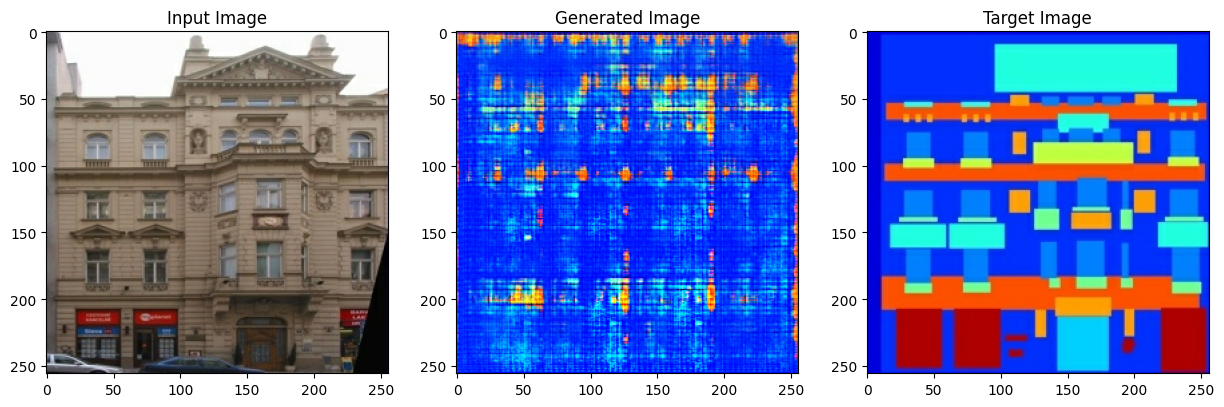

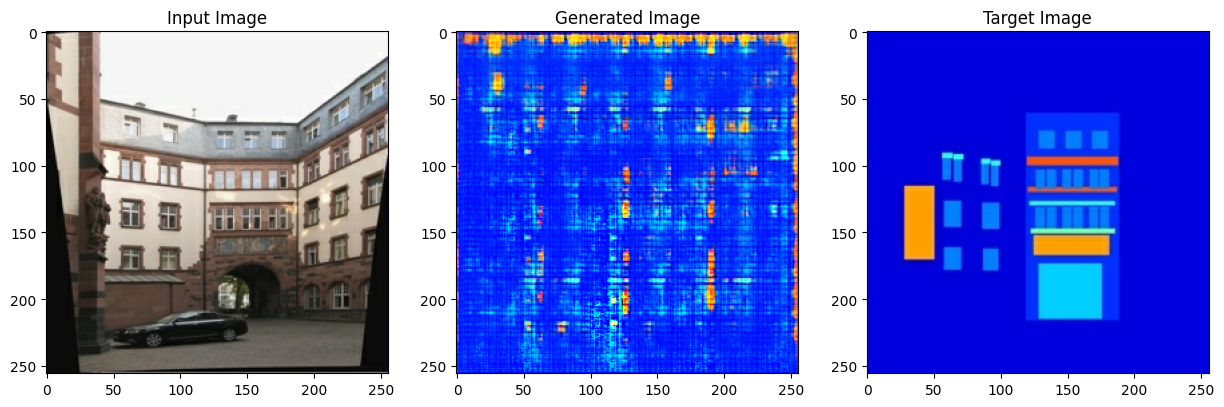

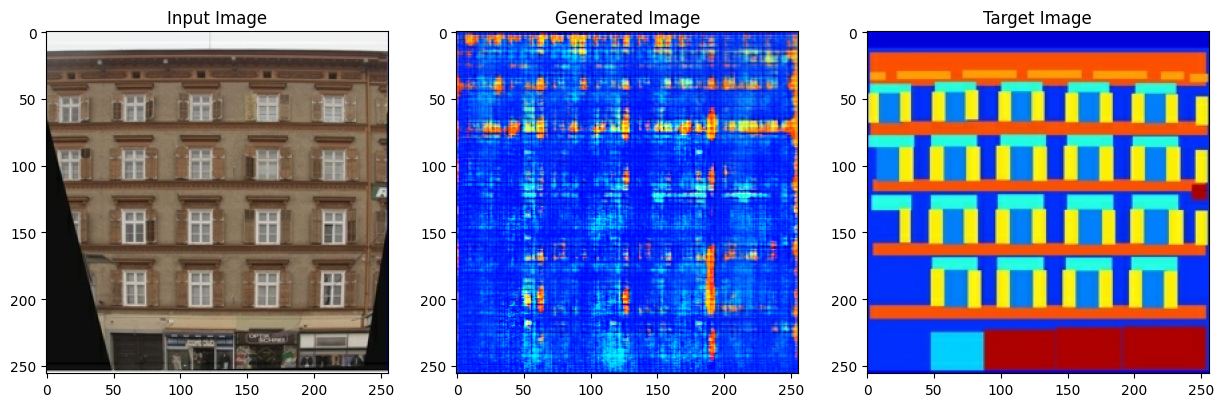

In [18]:
import matplotlib.pyplot as plt

# Function to display input, generated, and target images
def display_images(input_image, generated_image, target):
    plt.figure(figsize=(15, 15))

    # Display input image
    plt.subplot(1, 3, 1)
    plt.title('Input Image')
    plt.imshow((input_image[0] * 0.5) + 0.5)  # Convert from [-1, 1] to [0, 1]

    # Display generated image
    plt.subplot(1, 3, 2)
    plt.title('Generated Image')
    plt.imshow((generated_image[0] * 0.5) + 0.5)

    # Display target image
    plt.subplot(1, 3, 3)
    plt.title('Target Image')
    plt.imshow((target[0] * 0.5) + 0.5)
    plt.show()

# Test the model on a few test images
for input_image, target in test_dataset.take(3):  # Take 3 examples from the test set
    generated_image = generator(input_image, training=False)
    display_images(input_image, generated_image, target)
